In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import detectors   
from astropy.cosmology import Planck18
from nest import pls as pls
import matplotlib.cm as cm

cosmo = Planck18
H0 =  cosmo.H0.to('1/s').value
h = 0.7

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Et $\Delta$

In [3]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40


pls_ET_triang = pls.PLS('ET A', 'ET B', f, fref, 't', snr, Tobs, beta_min, beta_max, None)


f_pls_10km_coba, pls_10km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)


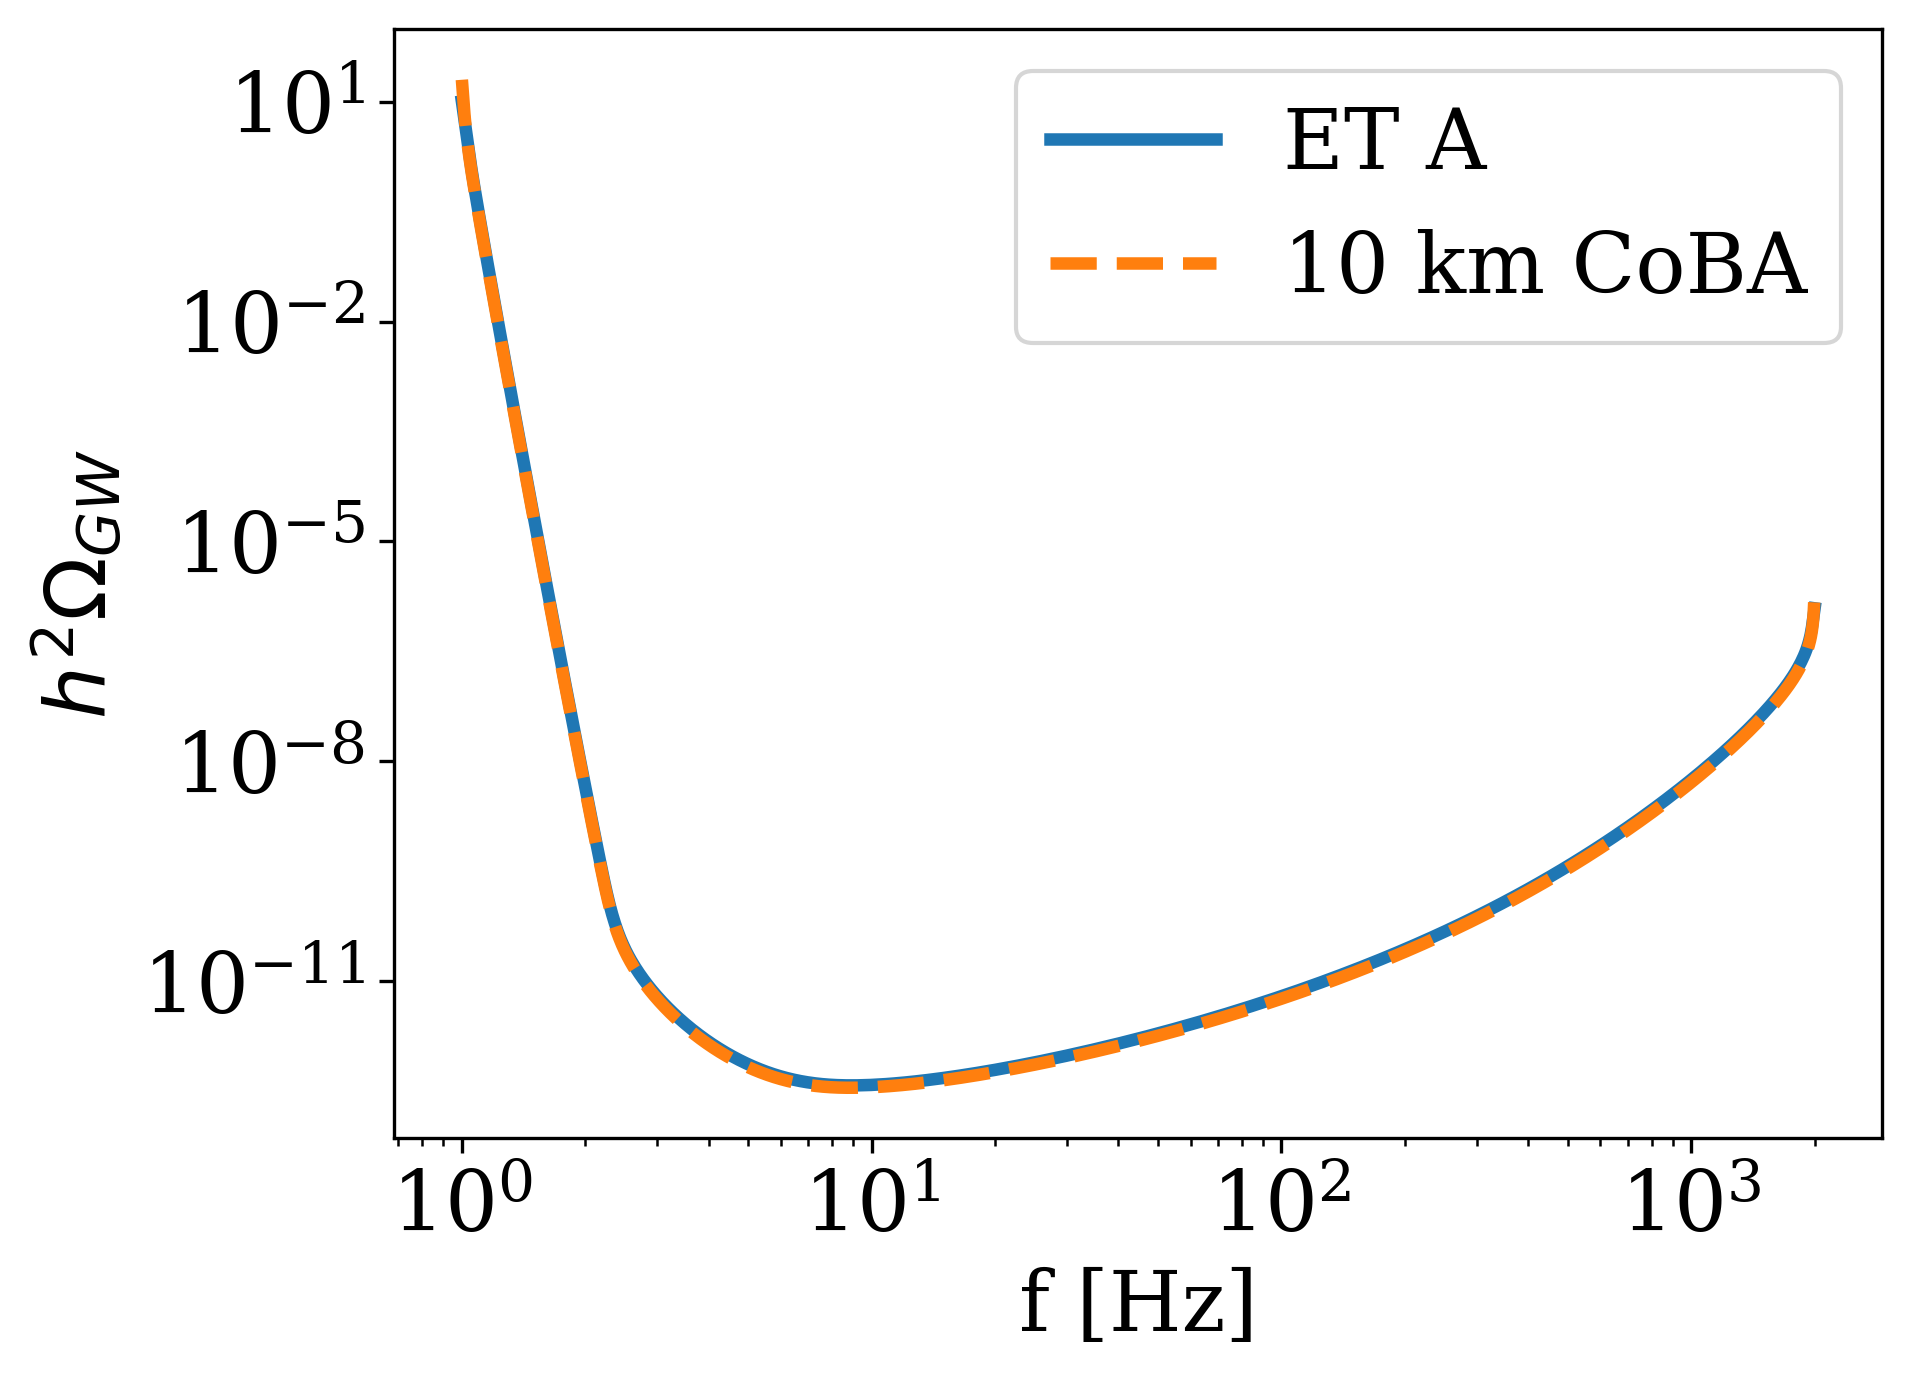

In [4]:
plt.plot(f, pls_ET_triang/np.sqrt(3), label='ET A')
plt.plot(f_pls_10km_coba, pls_10km_coba, label='10 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()

* ET 2L $\alpha = 0^{\circ}$

In [5]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40


pls_ET_2L = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(0))

f_pls_15km_coba, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)



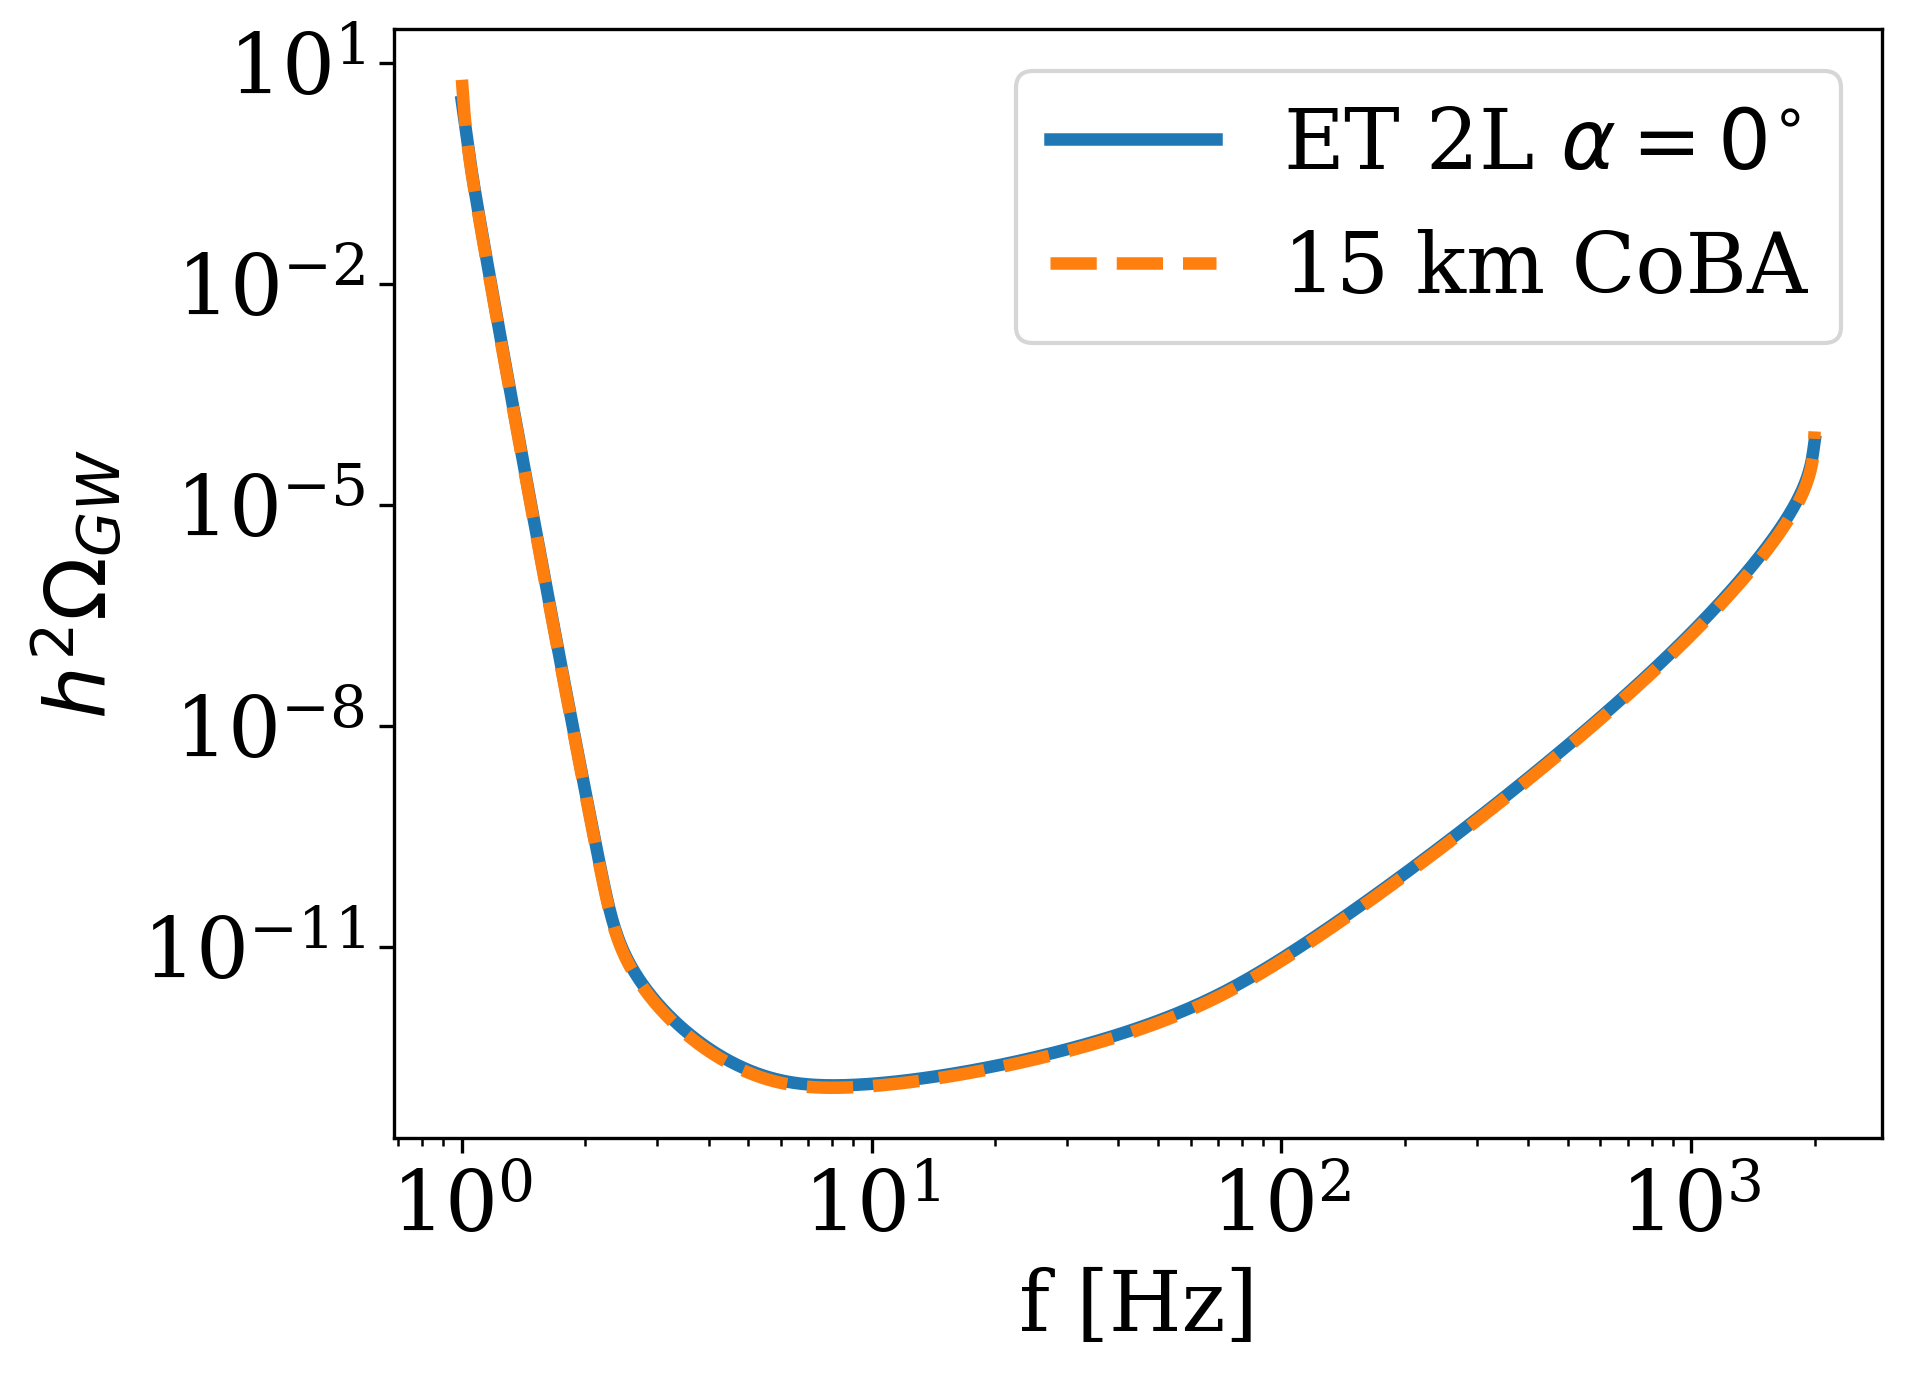

In [6]:
plt.plot(f, pls_ET_2L, label=r'ET 2L $\alpha =0^{\circ}$')
plt.plot(f_pls_15km_coba, pls_15km_coba, label='15 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()
    

* ET 2L $\alpha =42.5^{\circ}$

In [7]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_ET_2L_425 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(42.5))
pls_ET_2L_45 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(45))
f_pls_15km_coba, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L45deg_15km_HFLFcryo.txt', unpack=True)


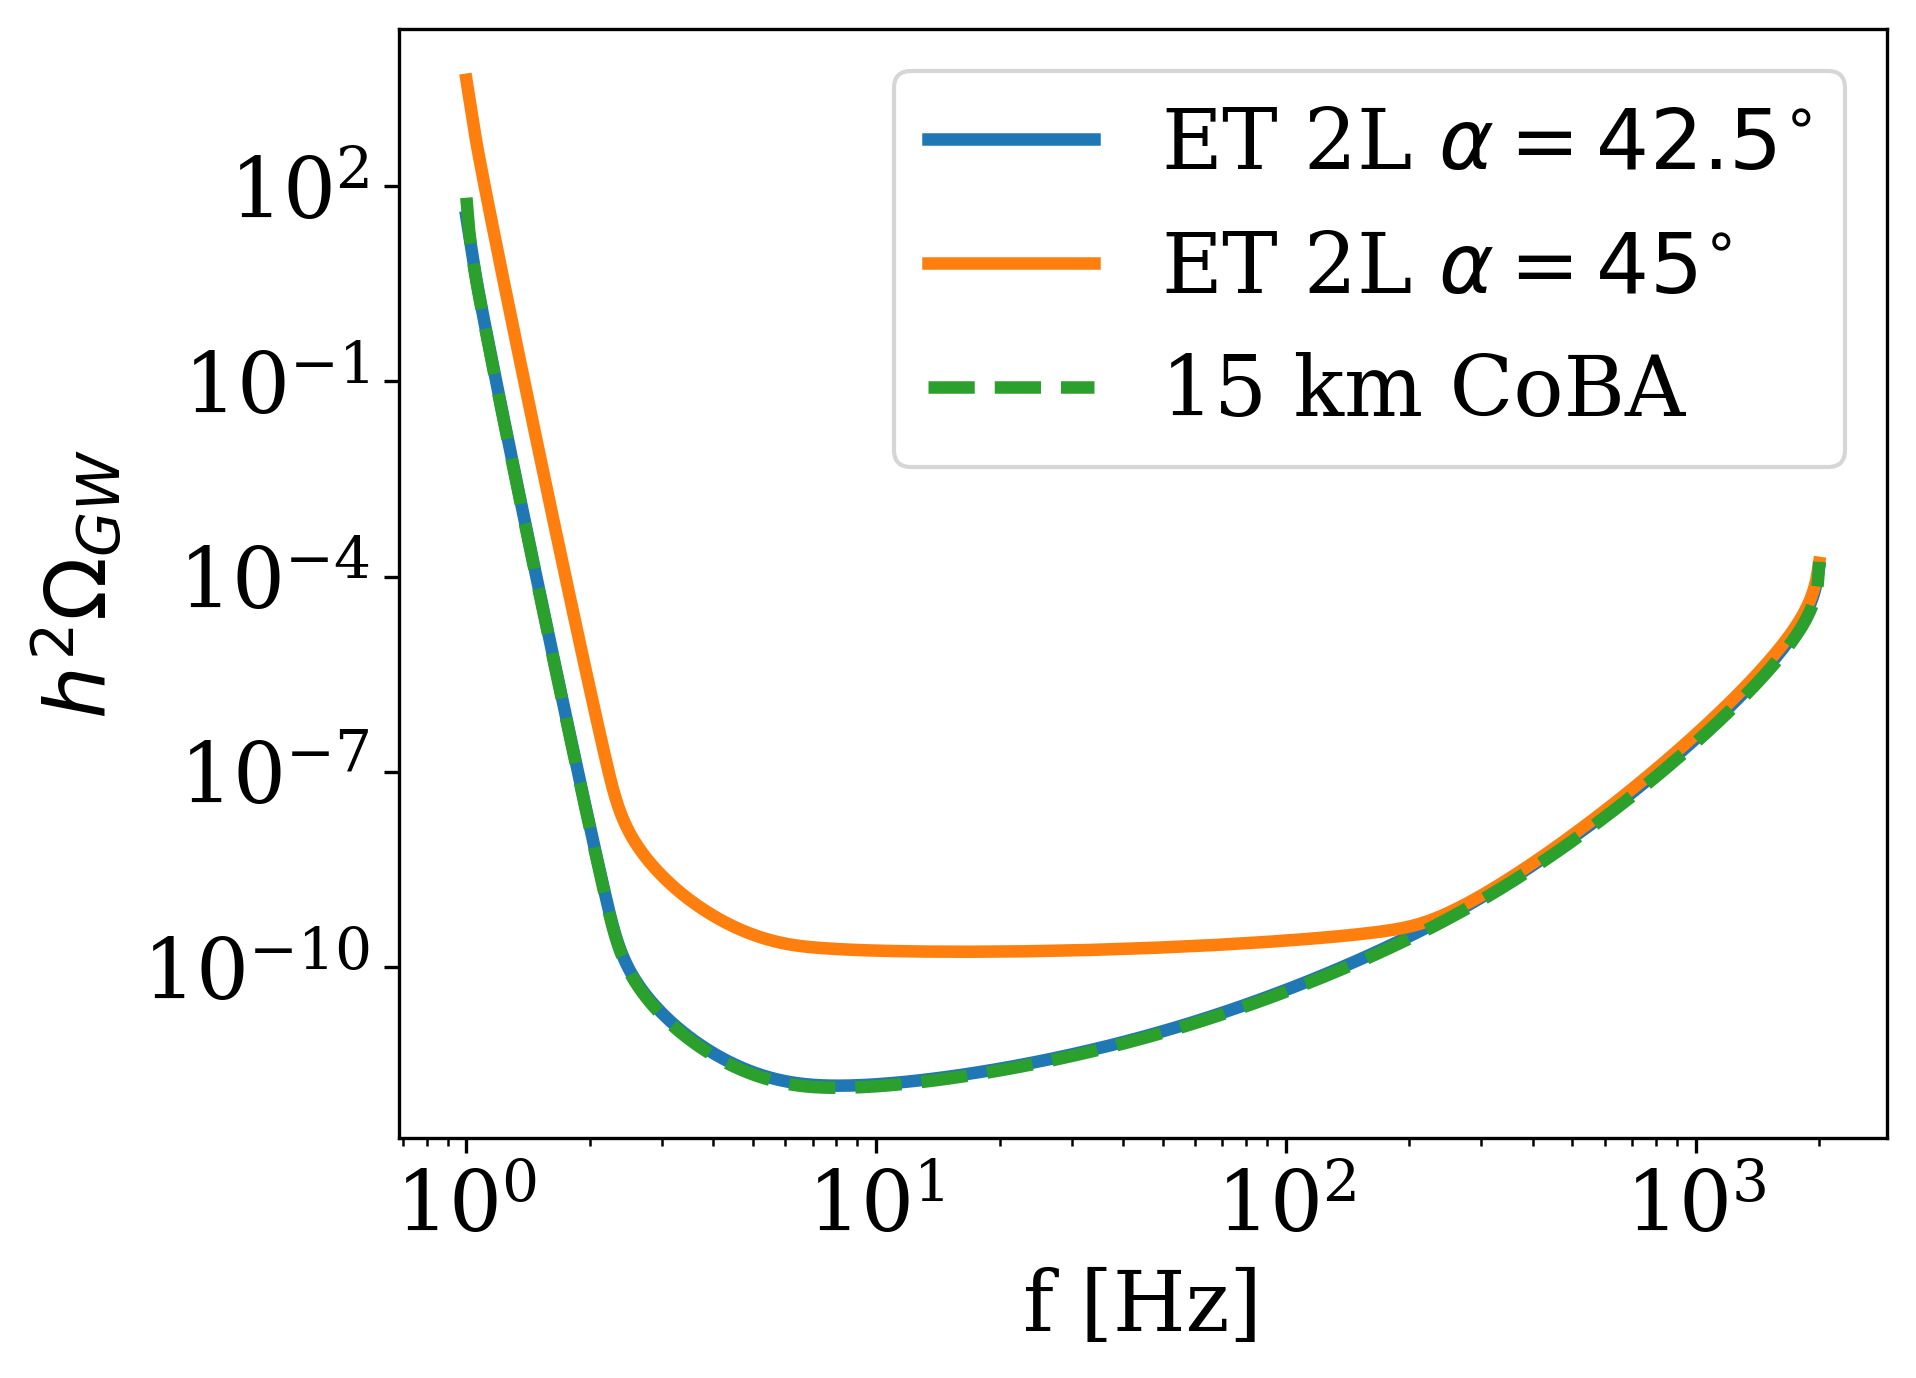

In [8]:
plt.plot(f, pls_ET_2L_425, label=r'ET 2L $\alpha =42.5^{\circ}$')
plt.plot(f, pls_ET_2L_45, label=r'ET 2L $\alpha =45^{\circ}$')
plt.plot(f_pls_15km_coba, pls_15km_coba, label='15 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()


* LISA

In [13]:
f = np.logspace(np.log10(3e-5), np.log10(5e-1), 1000)

fref = 1e-2
snr = 10
Tobs = 1
beta_min = -10
beta_max = 10

pls_LISA = pls.PLS_LISA(f, fref, 't', snr, Tobs, beta_min, beta_max)

f_pls, pls_check = np.loadtxt('LISA_sens.txt', unpack=True, usecols=(0, 3))

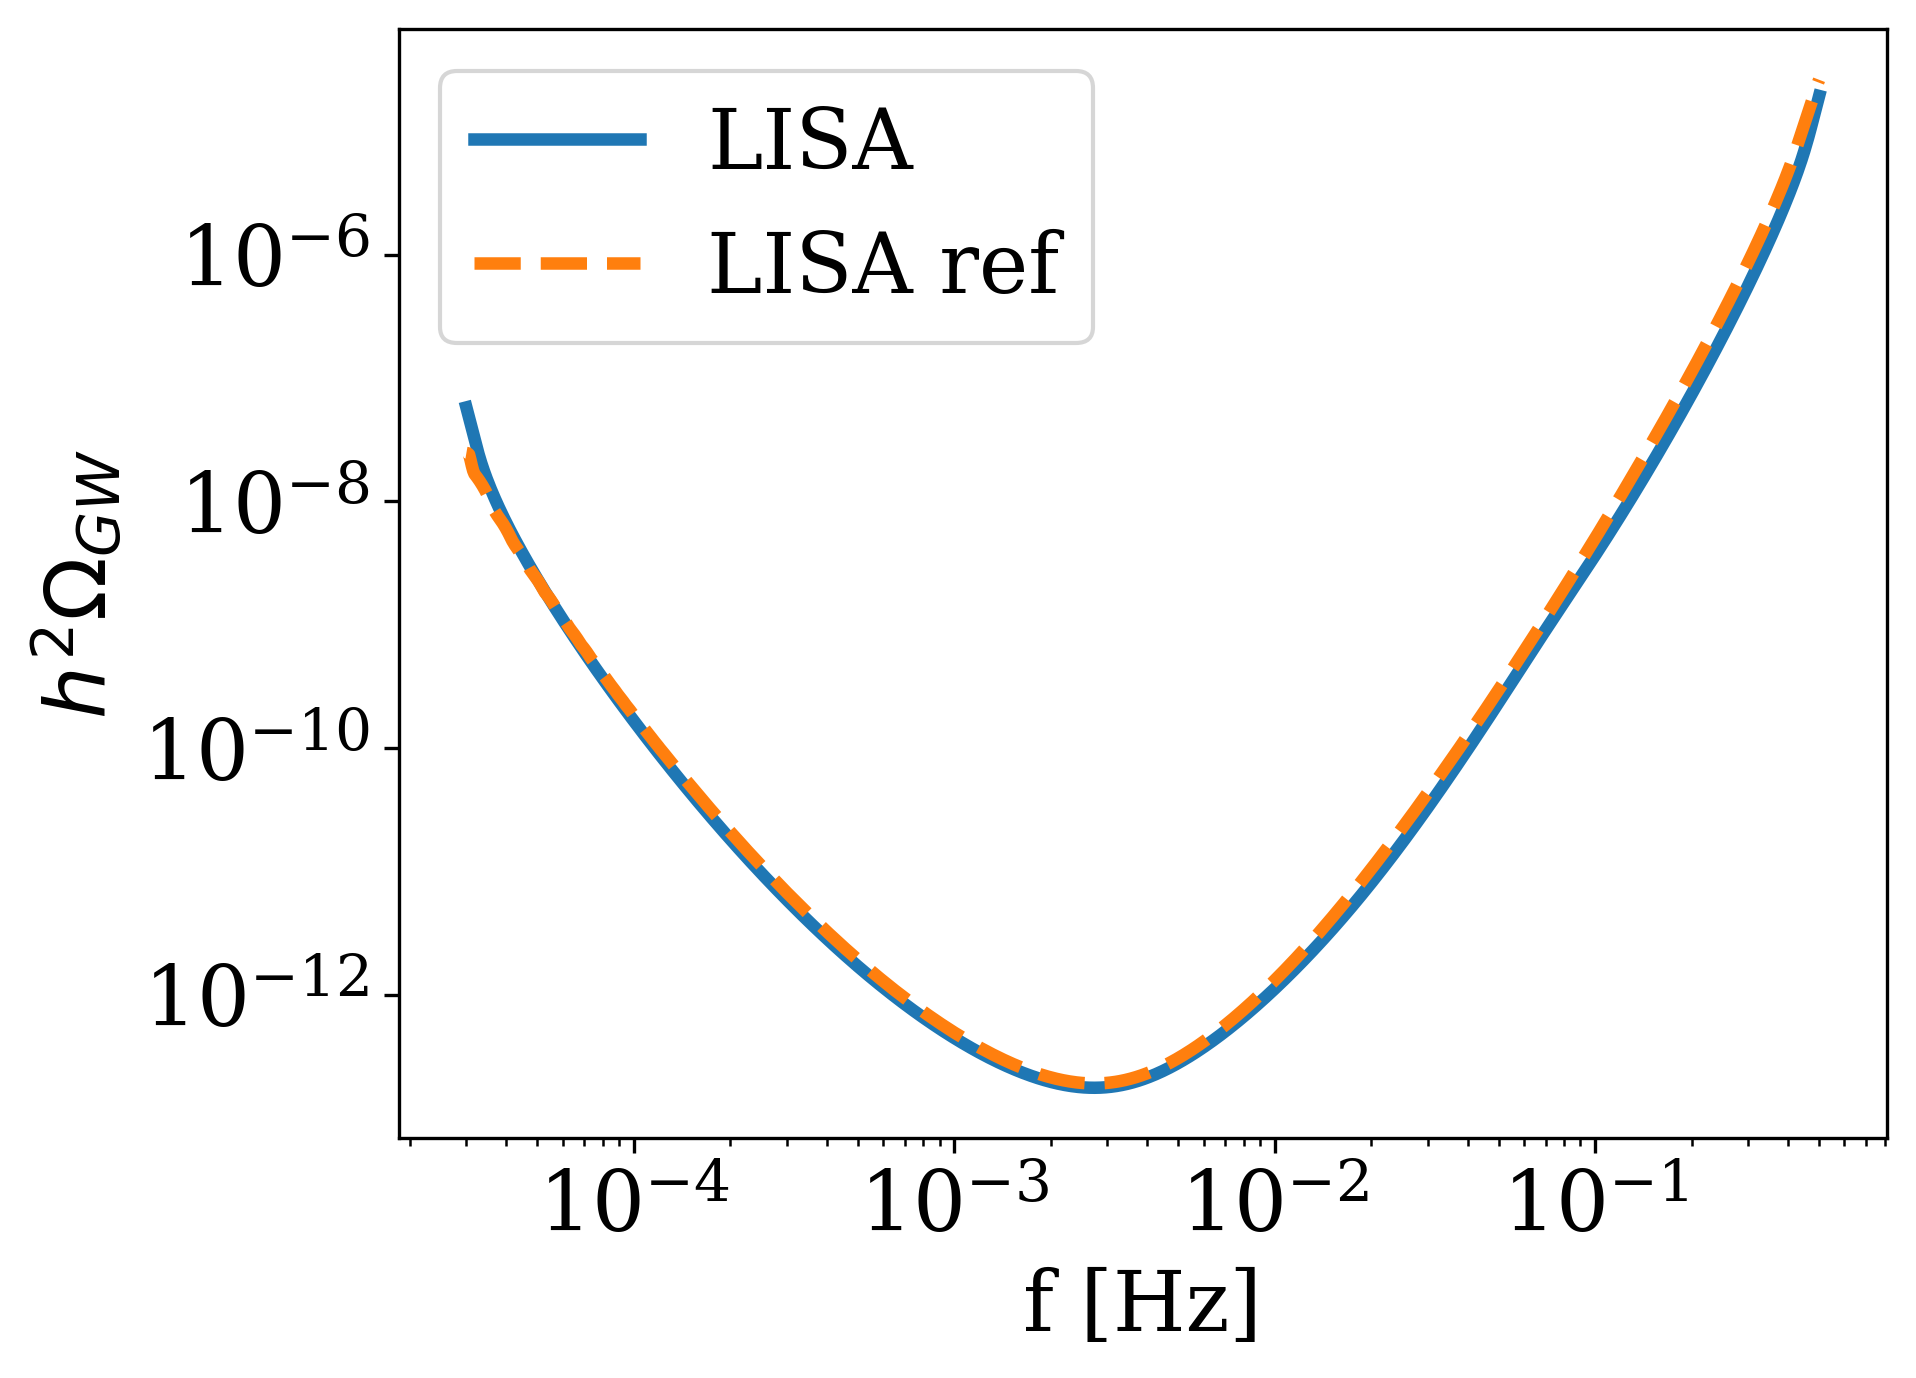

In [14]:
plt.plot(f, pls_LISA, label='LISA')
plt.plot(f_pls, pls_check, label='LISA ref', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()